In [ ]:
"""
To implement the axon finding that was brainstormed into
4 parts

1) Candidates
2) Filtering
3) Combining
4) Ranking

"""

In [1]:
from os import sys
sys.path.append("/meshAfterParty/")
#sys.path.append("../../meshAfterParty/meshAfterParty")

In [2]:
from importlib import reload
import os
from pathlib import Path
os.getcwd()

import neuron_utils as nru
nru = reload(nru)
import neuron
neuron=reload(neuron)
import neuron_visualizations as nviz
import time
import system_utils as su

# Processing the mesh with 11/24 updated way

In [3]:
import trimesh_utils as tu
current_neuron_mesh = tu.load_mesh_no_processing("/notebooks/test_neurons/meshafterparty_processed/12345_double_soma_meshafterparty_9_29.off")

In [4]:
nviz.plot_objects(current_neuron_mesh)

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [7]:
neuron_obj = neuron.Neuron(current_neuron_mesh,
              segment_id=12345,
             description="classic_double_soma_11_24",
                          suppress_preprocessing_print=False,
                          suppress_output=False)

--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
Skipping the hole filling
use_meshafterparty = True
Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 5000.0 
large_mesh_threshold_inner = 5000.0 
soma_size_threshold = 937.5 
soma_size_threshold_max = 12000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
xvfb-run -n 8908 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Compartment/Axon/temp/neuron_18645.off -o /notebooks/Platinum_Compartment/Axon/temp/neuron_18645_fill_holes.off -s /notebooks/Platinum_Compartment/Axon/temp/fill_holes_214250.mls
removed temporary input file: /notebooks/Platinum_Compartment/Axon/temp/neuron_18645.off
removed temporary output file: /notebooks/Platinum_Compartment/Axon/temp/neuron_18645_fill_holes.off
/notebooks/Platinum_Compartment/Axon/temp/fill_holes_214250.mls is being deleted....
xvfb-run -n 1162 -s "-screen 0 800x600x24" meshlabserver $@


-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(10639, 3), faces.shape=(21274, 3))>

1) Starting: Mesh importing and Pymesh fix
loading mesh from vertices and triangles array
1) Finished: Mesh importing and Pymesh fix: 0.0011157989501953125
2) Staring: Generating CGAL segmentation for neuron
Done writing OFF file

Starting CGAL segmentation
Right before cgal segmentation, clusters = 3, smoothness = 0.2, path_and_filename = /notebooks/Platinum_Compartment/Axon/temp/1234501_fixed 
1
Finished CGAL segmentation algorithm: 1.8495838642120361
2) Finished: Generating CGAL segmentation for neuron: 2.1857948303222656
3) Staring: Generating Graph Structure and Identifying Soma using soma size threshold  = 3000
my_list_keys = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
changed the median value
changed the mean value
changed the 

# total split meshes = 79
viable_meshes = [0]
There were 78 pieces found after size threshold
# of soma containing seperate meshes = 1
meshes with somas = {0: [0]}


----Working on soma-containing mesh piece 0----
current_soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(3190, 3), faces.shape=(6255, 3))>]
current_mesh = <trimesh.Trimesh(vertices.shape=(571170, 3), faces.shape=(1147156, 3))>

inside Soma subtraction
Total Time for soma mesh cancellation = 1.739
mesh_pieces_without_soma = [<trimesh.Trimesh(vertices.shape=(232471, 3), faces.shape=(466929, 3))>, <trimesh.Trimesh(vertices.shape=(153577, 3), faces.shape=(308195, 3))>, <trimesh.Trimesh(vertices.shape=(57007, 3), faces.shape=(114743, 3))>, <trimesh.Trimesh(vertices.shape=(55016, 3), faces.shape=(110265, 3))>, <trimesh.Trimesh(vertices.shape=(51861, 3), faces.shape=(104099, 3))>, <trimesh.Trimesh(vertices.shape=(1218, 3), faces.shape=(2394, 3))>]
Total time for Subtract Soam = 1.7396774291992188
Total time for Original_mesh_fa


-----Before filtering away multiple disconneted soma pieces-----
# of soma containing seperate meshes = 1
meshes with somas = {0: [0, 1]}
Number of not_processed_soma_containing_meshes = 0

-----After filtering away multiple disconneted soma pieces-----
# of soma containing seperate meshes = 1
meshes with somas = {0: [0, 1]}


----Working on soma-containing mesh piece 0----

inside Soma subtraction
Total Time for soma mesh cancellation = 1.77
Total time for Subtract Soam = 1.7704613208770752
Total time for Original_mesh_faces_map for mesh_pieces without soma= 0.844196081161499
Total time for Original_mesh_faces_map for somas= 0.6763644218444824
new_floating_pieces = []
Total time for sig_non_soma_pieces= 11.691700220108032
Total time for split= 9.5367431640625e-07
Total time for mesh_pieces_connectivity= 16.493048906326294
# of insignificant_limbs = 0 with trimesh : []
# of not_processed_soma_containing_meshes = 0 with trimesh : []


----- Working on Proper Limb # 0 ---------
meshpart

100%|██████████| 1/1 [00:03<00:00,  3.31s/it]


Time for 1st pass MP skeletonization: 4.651890754699707
connecting at the root
branches_touching_root = [60]
length of Graph = 15706
Working on path [7923. 7950. 7993. 8001.]
path_degrees = [3, 2, 2, 3]
max(kept_branches_idx) = 60, len(kept_branches_idx) = 60
empty_indices % = 0.0
 conflict_indices % = 0.013085916550466588
AFTER face_lookup_resolved_test
Decomposing first pass: 9.437914848327637
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [15752, 1756, 9024, 4843, 5620, 2389, 2952, 1987, 2289, 4215, 11553, 11105, 7853, 15933, 4548, 10085, 15272, 661, 222, 7934, 1000, 2611, 12829, 883, 8848, 11437, 11080, 4679, 2779, 2610, 9876, 2389, 2258, 7367, 10486, 12959, 15416, 16112, 3327]
mesh_large_connectivity: 2.0350253582000732
Finding MAP candidates connected components: 0.0003802776336669922
len(filtered_pieces) = 2
skeleton_connectivity_MP : 0.2377636432647705
Grouping MP Sublimbs by Graph: 0.034531116485


---- Working on (0, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 12128.648687839128
sk_conn = [0]
conn = [0]
winning_vertex = [738672.27000763 911719.49572209 859073.88665578]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [6]
MAP_stitch_point_on_end_or_branch = False
Using max stitch distance (300) for smoothing because stitch_distance greater (619.265671807665) 
Found winning edge: [136, 137.0]
in remove edge


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.029895776193088315
 conflict_indices % = 0.002057048820625343
AFTER face_lookup_resolved_test


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.027277277277277277
 conflict_indices % = 0.01614114114114114
AFTER face_lookup_resolved_test
Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_corre

AFTER face_lookup_resolved_test


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.10863757791629564
 conflict_indices % = 0.005120213713268032
AFTER face_lookup_resolved_test
Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (8, 0) 




---- Working on (9, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 19748.827771383607
sk_conn = [0]
conn = [0]
winning_vertex = [740556.37017036 948033.81589711 881349.96314501]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [3]
MAP_stitch_point_on_end_or_branch = False
Using max stitch distance (300) for smoothing because stitch_distance greater (596.4701736183437) 
Found winning edge: [2, 4.0]
in remove edge


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empt



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.006341885269530124
 conflict_indices % = 0.004612280196021909
AFTER face_lookup_resolved_test


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.01932367149758454
 conflict_indices % = 0.006864988558352402
AFTER face_lookup_resolved_test
Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (10, 1) 



Time for decomp of Limb = 242.78531217575073
Number of matching vertices = 108
Only one endpoint after filtering away the endpoints that are not on the skeleton


----- Working on Proper Limb # 1 ---------
meshparty_segment_size = 100
Time for preparing soma vertices and root: 4.76837158203125e-06
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:01<00:00,  1.49s/it]


Time for 1st pass MP skeletonization: 2.314955949783325
branches_touching_root = [13]
length of Graph = 10874
Working on path [6621. 6628. 6630. 6635. 6638. 6640.]
path_degrees = [3, 2, 2, 2, 2, 3]
Working on path [10874.  6651.  6662.]
path_degrees = [4, 2, 3]
max(kept_branches_idx) = 44, len(kept_branches_idx) = 43
empty_indices % = 0.0
 conflict_indices % = 0.010926817059713548
AFTER face_lookup_resolved_test
Decomposing first pass: 6.025309085845947
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [5515, 17878, 1995, 5559, 8248, 166, 4253, 1118, 296, 1761, 11613, 5400, 4926, 4847, 7296, 3345, 736, 2752, 21113, 335, 1651, 13128, 12494]
mesh_large_connectivity: 0.6233611106872559
Finding MAP candidates connected components: 0.00028824806213378906
len(filtered_pieces) = 2
skeleton_connectivity_MP : 0.18325090408325195
Grouping MP Sublimbs by Graph: 0.03508639335632324
Divinding into MP and MAP pieces: 9.53


---- Working on (0, 0) connection-----
Current stitch point was a branch or endpoint
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [ 621433.15682079 1079898.78396661  847175.44682173]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True
Using max stitch distance (300) for smoothing because stitch_distance greater (1654.3397272011255) 
Found winning edge: [822, 823.0]
in remove edge
Using max stitch distance (300) for smoothing because stitch_distance greater (1679.8453945192477) 
Found winning edge: [101, 102.0]
in remove edge


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.022187494321382492
 conflict_indices % = 0.002126074394432229
AFTER face_lookup_resolved_test
MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
Current s



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.008792674792310957
 conflict_indices % = 0.0020010915044569766
AFTER face_lookup_resolved_test
Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (8, 0) 




---- Working on (11, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 12534.40695166551
sk_conn = [0]
conn = [0]
winning_vertex = [ 751852.71606945 1034781.42029594  841826.78472209]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [10]
MAP_stitch_point_on_end_or_branch = False
Using max stitch distance (300) for smoothing because stitch_distance greater (451.26090922765246) 
Found winning edge: [9, 10.0]
in remove edge


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.04790495

100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


Time for 1st pass MP skeletonization: 1.4720327854156494
connecting at the root
branches_touching_root = [46]
length of Graph = 7320
Working on path [4679. 4683. 4691. 4696. 4699.]
path_degrees = [3, 2, 2, 2, 3]
Working on path [5644. 5650. 5659. 5666. 5682.]
path_degrees = [3, 2, 2, 2, 3]
max(kept_branches_idx) = 46, len(kept_branches_idx) = 45
empty_indices % = 0.0
 conflict_indices % = 0.018000262777558798
AFTER face_lookup_resolved_test
Decomposing first pass: 5.061342477798462
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [17924, 3667, 308, 29, 4516, 62, 1195, 4277, 2705, 7224, 13090, 8236, 123, 204, 4781, 9468]
mesh_large_connectivity: 0.26006555557250977
Finding MAP candidates connected components: 0.00021696090698242188
len(filtered_pieces) = 2
skeleton_connectivity_MP : 0.17453527450561523
Grouping MP Sublimbs by Graph: 0.035628318786621094
Divinding into MP and MAP pieces: 9.5367431640625e-07
-


---- Working on (0, 0) connection-----
Current stitch point was a branch or endpoint
sk_conn = [2, 6]
conn = [2, 6]
winning_vertex = [851414.76760302 975469.56668999 790137.88232477]
MP_branches_with_stitch_point = [2, 6]
MAP_branches_with_stitch_point = [8]
MAP_stitch_point_on_end_or_branch = True
Using max stitch distance (300) for smoothing because stitch_distance greater (1455.6093388494808) 
Found winning edge: [9, 10.0]
in remove edge
Using max stitch distance (300) for smoothing because stitch_distance greater (1415.3232576079597) 
Found winning edge: [9, 10.0]
in remove edge


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.027501701837985025
 conflict_indices % = 0.029339686861810755
AFTER face_lookup_resolved_test
MP_branches_with_stitch_point= [2, 6]
MP_branches_for_correspondence = [2 6]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (2, 0) connection-----
Current stitch poi



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.024194702934860417
 conflict_indices % = 0.0041517537580529704
AFTER face_lookup_resolved_test


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.029574386010029576
 conflict_indices % = 0.013115597274013116
AFTER face_lookup_resolved_test
Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 1) 



Time for decomp of Limb = 67.36564207077026
Number of matching vertices = 79
Only one endpoint after filtering away the endpoints that are not on the skeleton


----- Working on Proper Limb # 3 ---------
meshparty_segment_size = 100
Time for preparing soma vertices and root: 5.4836273193359375e-06
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  1.43it/s]


Time for 1st pass MP skeletonization: 1.2653207778930664
connecting at the root
branches_touching_root = [32]
length of Graph = 6949
Working on path [3997. 4010. 4021. 4034. 4047. 4062. 4063.]
path_degrees = [3, 2, 2, 2, 2, 2, 3]
Working on path [5163. 5168. 5170. 5172. 5174. 5178. 5182. 5183.]
path_degrees = [3, 2, 2, 2, 2, 2, 2, 3]
max(kept_branches_idx) = 32, len(kept_branches_idx) = 31
empty_indices % = 0.0
 conflict_indices % = 0.009446435247239472
AFTER face_lookup_resolved_test
Decomposing first pass: 4.697293758392334
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [1386, 1570, 7137, 5376, 5025, 4626, 7879, 18478, 10710, 3445, 8310, 15392]
mesh_large_connectivity: 0.22614717483520508
Finding MAP candidates connected components: 0.00017023086547851562
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.12842941284179688
Grouping MP Sublimbs by Graph: 0.021152019500732422
Divinding into MP and MAP 

AFTER face_lookup_resolved_test


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.04394794991406825
 conflict_indices % = 0.006792699893608315
AFTER face_lookup_resolved_test
Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 14874.431908760438
sk_conn = [1]
conn = [1]
winning_vertex = [720961.00684912 991978.32523568 900793.06609987]
MP_branches_with_stitch_point = [1]
MAP_branches_with_stitch_point = [4]
MAP_stitch_point_on_end_or_branch = False
Using max stitch distance (300) for smoothing because stitch_distance greater (672.4881469785207) 
Found winning edge: [0, 2.0]
in remove edge


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empt

  0%|          | 0/1 [00:00<?, ?it/s]

cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


Time for 1st pass MP skeletonization: 1.3486552238464355
connecting at the root
branches_touching_root = [33]
length of Graph = 8591
Working on path [7819. 7820. 7821. 7822. 7823. 7824.]
path_degrees = [3, 2, 2, 2, 2, 3]
max(kept_branches_idx) = 33, len(kept_branches_idx) = 33
empty_indices % = 0.0
 conflict_indices % = 0.008275516174872523
AFTER face_lookup_resolved_test
Decomposing first pass: 5.267836570739746
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [964, 14587, 11992, 5523, 366, 294, 750, 3342, 21569, 235, 8905, 3641]
mesh_large_connectivity: 0.1907176971435547
Finding MAP candidates connected components: 0.0001647472381591797
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.18236446380615234
Grouping MP Sublimbs by Graph: 0.02930593490600586
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.00456690788269043
inside skeletoni

Current stitch point was a branch or endpoint
sk_conn = [0, 6]
conn = [0, 6]
winning_vertex = [ 979630.63206844 1080016.0396105  1030311.16137809]
MP_branches_with_stitch_point = [0, 2, 6]
MAP_branches_with_stitch_point = [5]
MAP_stitch_point_on_end_or_branch = True
Using max stitch distance (300) for smoothing because stitch_distance greater (747.8849812953873) 
Found winning edge: [9, 10.0]
in remove edge
Using max stitch distance (300) for smoothing because stitch_distance greater (761.7647911649238) 
Found winning edge: [346, 347.0]
in remove edge
Using max stitch distance (300) for smoothing because stitch_distance greater (579.9881001959096) 
Found winning edge: [9, 10.0]
in remove edge


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.035260683460809766
 conflict_indices % = 0.0005964493719738965
AFTER face_lookup_resolved_test
MP_branches_with_stitch_point= [0, 2, 6]
MP_branches_for_correspondence = [0 6]
MP_lefto

  0%|          | 0/1 [00:00<?, ?it/s]

meshparty_segment_size = 100
Time for preparing soma vertices and root: 5.0067901611328125e-06
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


Time for 1st pass MP skeletonization: 0.7678041458129883
connecting at the root
branches_touching_root = [6]
length of Graph = 4471
max(kept_branches_idx) = 6, len(kept_branches_idx) = 7
empty_indices % = 0.0
 conflict_indices % = 0.0036492133489957443
AFTER face_lookup_resolved_test
Decomposing first pass: 3.1786720752716064
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [38649, 6773, 3165, 4351, 12866, 34225, 3829]
mesh_large_connectivity: 0.15975189208984375
Finding MAP candidates connected components: 0.00014162063598632812
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.023497343063354492
Grouping MP Sublimbs by Graph: 3.5762786865234375e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.006543159484863281
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screen

  0%|          | 0/1 [00:00<?, ?it/s]

AFTER face_lookup_resolved_test
Total time for MAP sublimb #0 mesh processing = 50.60710310935974
correspondence_1_to_1: 5.314519643783569
Total time for MAP sublimb processing 50.60726451873779
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 54.73774480819702
Number of matching vertices = 48
Only one endpoint after filtering away the endpoints that are not on the skeleton


----- Working on Proper Limb # 6 ---------
meshparty_segment_size = 100
Time for preparing soma vertices and root: 5.0067901611328125e-06
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  4.11it/s]


Time for 1st pass MP skeletonization: 0.5525326728820801
branches_touching_root = [6]
length of Graph = 4060
Working on path [2646. 2656. 2663.]
path_degrees = [3, 2, 3]
max(kept_branches_idx) = 16, len(kept_branches_idx) = 16
empty_indices % = 0.0
 conflict_indices % = 0.01062326563271421
AFTER face_lookup_resolved_test
Decomposing first pass: 1.9589684009552002
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [6575, 1241, 1103, 502, 1296, 4671, 4164, 15080, 4714]
mesh_large_connectivity: 0.08045721054077148
Finding MAP candidates connected components: 0.00015234947204589844
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.07831311225891113
Grouping MP Sublimbs by Graph: 0.012689352035522461
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.005639314651489258
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_rec

  0%|          | 0/1 [00:00<?, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.07465503007430122
 conflict_indices % = 0.0038919683924991157
AFTER face_lookup_resolved_test
MP_branches_with_stitch_point= [1, 2]
MP_branches_for_correspondence = [1 2]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 



Time for decomp of Limb = 33.94462299346924
Number of matching vertices = 29
Only one endpoint after filtering away the endpoints that are not on the skeleton


----- Working on Proper Limb # 7 ---------
meshparty_segment_size = 100
Time for preparing soma vertices and root: 5.0067901611328125e-06
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  3.92it/s]


Time for 1st pass MP skeletonization: 0.5696842670440674
branches_touching_root = [3]
length of Graph = 4120
max(kept_branches_idx) = 18, len(kept_branches_idx) = 19
empty_indices % = 0.0
 conflict_indices % = 0.010767942297502863
AFTER face_lookup_resolved_test
Decomposing first pass: 2.5022242069244385
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [2360, 3204, 92, 792, 7177, 4823]
mesh_large_connectivity: 0.04007744789123535
Finding MAP candidates connected components: 0.0001506805419921875
len(filtered_pieces) = 2
skeleton_connectivity_MP : 0.12091588973999023
Grouping MP Sublimbs by Graph: 0.024784326553344727
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.00225067138671875
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 5624 -s "-screen


---- Working on (0, 0) connection-----
Current stitch point was not a branch or endpoint, shortest_path_length to one = 12999.605165350727
sk_conn = [1]
conn = [1]
winning_vertex = [879642.21342832 994737.91480305 829191.99448761]
MP_branches_with_stitch_point = [1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False
Using max stitch distance (300) for smoothing because stitch_distance greater (910.0835684582706) 
Found winning edge: [127, 183.0]
in remove edge


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.06393408427200667
 conflict_indices % = 0.0036503963287442638
AFTER face_lookup_resolved_test


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.05986754966887417
 conflict_indices % = 0.014172185430463577
AFTER face_lookup_resolved_test
Deleting branches from dictionary
MP_branches_with_stitch_point= [1]
MP_branches_for_corr

  0%|          | 0/1 [00:00<?, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.07630863358259687
 conflict_indices % = 0.0020394289598912306
AFTER face_lookup_resolved_test
MP_branches_with_stitch_point= [2, 3]
MP_branches_for_correspondence = [2 3]
MP_leftover = [], MP_leftover_idx = []
 Finished with (3, 1) 



Time for decomp of Limb = 35.22238326072693
Number of matching vertices = 21
Only one endpoint after filtering away the endpoints that are not on the skeleton


----- Working on Proper Limb # 8 ---------
meshparty_segment_size = 100
Time for preparing soma vertices and root: 5.0067901611328125e-06
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  9.40it/s]


Time for 1st pass MP skeletonization: 0.2940022945404053
branches_touching_root = [3]
length of Graph = 2356
max(kept_branches_idx) = 10, len(kept_branches_idx) = 11
empty_indices % = 0.0
 conflict_indices % = 0.009372356623244798
AFTER face_lookup_resolved_test
Decomposing first pass: 0.9871528148651123
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [4121, 177]
mesh_large_connectivity: 0.011407613754272461
Finding MAP candidates connected components: 8.7738037109375e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.08762788772583008
Grouping MP Sublimbs by Graph: 0.01522207260131836
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0037889480590820312
inside skeletonize_connected_branch and use_surface_after_CGAL=False, surface_reconstruction_size=1000
     Starting Screened Poisson
xvfb-run -n 794 -s "-screen 0 800x600x24" meshlabs

  0%|          | 0/1 [00:00<?, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.009001449385918072
 conflict_indices % = 0.03173392325882981
AFTER face_lookup_resolved_test
MP_branches_with_stitch_point= [2, 5]
MP_branches_for_correspondence = [2 5]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 11.27771520614624
Number of matching vertices = 13
Only one endpoint after filtering away the endpoints that are not on the skeleton


----- Working on Proper Limb # 9 ---------
meshparty_segment_size = 100
Time for preparing soma vertices and root: 5.0067901611328125e-06
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00, 29.79it/s]


Time for 1st pass MP skeletonization: 0.12239408493041992
connecting at the root
branches_touching_root = [4]
length of Graph = 935
max(kept_branches_idx) = 4, len(kept_branches_idx) = 5
empty_indices % = 0.0
 conflict_indices % = 0.014853370572553003
AFTER face_lookup_resolved_test
Decomposing first pass: 0.35538363456726074
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 6.723403930664062e-05
Total time for MAP sublimb processing 3.5762786865234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 6.747245788574219e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.040413618087768555
sbv[0].reshape(-1,3) = [[866601.8 999431.3 865586.1]]
closest_sk_pt_coord BEFORE = [866772.35565041 998723.19767362 866295.48548942]
current_skeleton.shape = (376, 2, 3)


100%|██████████| 1/1 [00:00<00:00, 197.70it/s]

Current stitch point was not a branch or endpoint, shortest_path_length to one = 199.9999390423719
Changing the stitch point becasue the distance to end or branch node was 199.9999390423719
New stitch point has degree 1
change_status for create soma extending pieces = True
closest_sk_pt_coord AFTER = [866671.73526598 998551.80371485 866273.13876054]
skipping soma 1 because closest skeleton node was already end node
endpoints_must_keep = {1: array([[866671.73526598, 998551.80371485, 866273.13876054]])}
The new branch info was none so skipping 

No soma extending branch was added for this sublimb even though it had a soma border (means they already existed)
MP (because soma touching verts) soma extension add: 0.12023639678955078
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.5987861156463623
Number of matching vertices = 39
Only one endpoint after filtering away the endpoints that are not on the skeleton


----- Working on Proper 

removed temporary input file: /notebooks/Platinum_Compartment/Axon/temp/None.off
removed temporary output file: /notebooks/Platinum_Compartment/Axon/temp/None_poisson.off
Using the close holes feature
xvfb-run -n 3538 -s "-screen 0 800x600x24" meshlabserver $@  -i /notebooks/Platinum_Compartment/Axon/temp/neuron_34278.off -o /notebooks/Platinum_Compartment/Axon/temp/neuron_34278_fill_holes.off -s /notebooks/Platinum_Compartment/Axon/temp/fill_holes_174287.mls
removed temporary input file: /notebooks/Platinum_Compartment/Axon/temp/neuron_34278.off
removed temporary output file: /notebooks/Platinum_Compartment/Axon/temp/neuron_34278_fill_holes.off
-----Time for Screened Poisson= 5.656048059463501
     Starting Calcification
No skeletons to stack so returning empty list
len_subgraphs AT BEGINNING of the loop
all graph is one component!
Total time for skeleton stitching = 0.0018417835235595703
The process was using a temp folder
Checking connected components after skeletonize_connected_bra

At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [12]
printing out current edge:
[[865530. 987791. 860718.]
 [865361. 982267. 862110.]]
edge_endpoints_to_process was empty so exiting loop after 17 iterations
starting_node in concept map (that should match the starting edge) = 8
Total time for branches to concept conversion = 0.2108464241027832

Done generating concept network 


recovered_touching_piece = [8]


---------Working on soma_idx = 1, soma_group_idx 0, endpt = [868182. 994111. 850103.]---------
Starting_edge inside branches_to_conept = [[868182. 994111. 850103.]
 [876770. 993157. 841525.]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [1]
printing out current edge:
[[868182. 994111. 850103.]
 [876770. 993157. 841525.]]
edge_endpoints_to_process was empty so exiting loop after 18 iterations
starting_node in concept map (that should match the starting edge) = 1
Total time for bran

Working on limb L0 branch 49
Working on limb L0 branch 34
Working on limb L0 branch 36
Working on limb L0 branch 51
Working on limb L0 branch 72
Working on limb L0 branch 35
Working on limb L0 branch 39
Working on limb L0 branch 59
Working on limb L0 branch 60
Working on limb L0 branch 3
Working on limb L0 branch 75
Working on limb L0 branch 38
Working on limb L0 branch 52
Working on limb L0 branch 2
Working on limb L0 branch 50
Working on limb L0 branch 31
Working on limb L0 branch 41
Working on limb L0 branch 33
Working on limb L0 branch 76
Working on limb L0 branch 44
Working on limb L0 branch 74
Working on limb L0 branch 16
Working on limb L0 branch 29
Working on limb L0 branch 53
Working on limb L0 branch 77
Working on limb L0 branch 28
Working on limb L0 branch 43
Working on limb L0 branch 46
Working on limb L0 branch 58
Working on limb L0 branch 47
Working on limb L0 branch 70
Working on limb L0 branch 27
Working on limb L0 branch 32
Working on limb L0 branch 6
Working on limb L

Working on limb L8 branch 7
Working on limb L8 branch 10
Working on limb L8 branch 4
Working on limb L8 branch 9
Working on limb L9 branch 4
Working on limb L9 branch 1
Working on limb L9 branch 2
Working on limb L9 branch 0
Working on limb L9 branch 3
functions_list = [<function median_mesh_center at 0x7f41ae870620>, <function n_faces_branch at 0x7f41ae8701e0>]
There was only one mesh found from the spine process and mesh split, returning empty array
There was only one mesh found from the spine process and mesh split, returning empty array
There was only one mesh found from the spine process and mesh split, returning empty array
There was only one mesh found from the spine process and mesh split, returning empty array
There was only one mesh found from the spine process and mesh split, returning empty array
There was only one mesh found from the spine process and mesh split, returning empty array
There was only one mesh found from the spine process and mesh split, returning empty arra

Working on limb L2 branch 35
No spines and using precomputed width
Working on limb L2 branch 21
No spines and using precomputed width
Working on limb L2 branch 32
No spines and using precomputed width
Working on limb L2 branch 24
No spines and using precomputed width
Working on limb L2 branch 30
Working on limb L2 branch 13
Working on limb L2 branch 37
No spines and using precomputed width
Working on limb L2 branch 29
No spines and using precomputed width
Working on limb L2 branch 34
No spines and using precomputed width
Working on limb L3 branch 36
No spines and using precomputed width
Working on limb L3 branch 34
Working on limb L3 branch 35
No spines and using precomputed width
Working on limb L3 branch 8
Working on limb L3 branch 15
Working on limb L3 branch 0
Working on limb L3 branch 13
Working on limb L3 branch 7
Working on limb L3 branch 9
Working on limb L3 branch 4
Working on limb L3 branch 29
No spines and using precomputed width
Working on limb L3 branch 5
Working on limb L

# Saving the Neuron Object

In [8]:
neuron_obj.save_compressed_neuron("/notebooks/test_neurons/meshafterparty_processed",
                                 export_mesh=True)

Saving Neuorn in suppress_output mode...please wait
Saved File at location: /notebooks/test_neurons/meshafterparty_processed/12345_classic_double_soma_11_24


# Loading Neuron Object

In [9]:
current_file = "/notebooks/test_neurons/meshafterparty_processed/12345_classic_double_soma_11_24"
neuron_obj = nru.decompress_neuron(filepath=current_file,
                                  original_mesh=current_file,
                                  suppress_output=True)


Decompressing Neuron in minimal output mode...please wait


# Visualizing Neuron

In [10]:
import neuron_searching as ns
ns = reload(ns)
current_neuron = neuron_obj

In [11]:
ret_col = nviz.visualize_neuron(current_neuron,
                                visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all",
                     mesh_resolution="limb",
                                skeleton_resolution="limb",
                     return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton
Working on  new stand alone scatter points


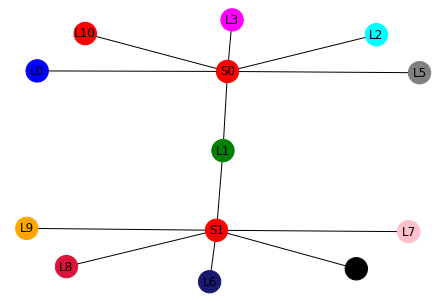

In [12]:
nviz.plot_soma_limb_concept_network(current_neuron,
                                   node_colors=ret_col)

# *************** Prework on Axon classification and finding distance from somas ******************


# Doing Axon Classification

# A) Doing Axon Classification

In [13]:
axon_like_limb_branch_dict = ns.axon_width_like_segments(current_neuron,
                                                        include_ais=True)

nviz.visualize_neuron(current_neuron,
                     limb_branch_dict=axon_like_limb_branch_dict,
                     mesh_color="red",
                      mesh_color_alpha=1,
                     mesh_whole_neuron=True)

functions_list = [<function width at 0x7f41ae8701e0>, <function median_mesh_center at 0x7f41ae870598>, <function n_spines at 0x7f41ae870400>, <function n_faces_branch at 0x7f41aef9ef28>, <function skeleton_distance_branch at 0x7f41ae870378>, <function spines_per_skeletal_length at 0x7f41ae870840>, <function no_spine_median_mesh_center at 0x7f41ae8706a8>]

 Working on visualization type: mesh
Working on  new stand alone scatter points


In [14]:
#How to give a limb_branch_dict as an argument
ns = reload(ns)
current_functions_list = ["axon_segment"]
limb_branch_dict_upstream_filter = ns.query_neuron(current_neuron,
                                   query="axon_segment==True",
                                   function_kwargs=dict(limb_branch_dict =axon_like_limb_branch_dict,
                                                        downstream_face_threshold=3000,
                                                        width_match_threshold=50,
                                                       print_flag=False),
                                   functions_list=current_functions_list)


functions_list = [<function axon_segment at 0x7f41ae870e18>]


In [15]:
colors_dict_returned = nviz.visualize_neuron(current_neuron,
                      limb_branch_dict=limb_branch_dict_upstream_filter,
                     mesh_color="red",
                     mesh_color_alpha=1,
                     mesh_whole_neuron=True,
                     return_color_dict=True)


 Working on visualization type: mesh
Working on  new stand alone scatter points


# B) Getting All of the Branches That are a certain Distance Away ---

In [16]:
soma_idx = 0

In [18]:
distance_from_soma_threshold = 30000
close_limb_branch_dict = ns.query_neuron(current_neuron,
                                        functions_list=[ns.skeletal_distance_from_soma],
                                        query=f"skeletal_distance_from_soma<{distance_from_soma_threshold}",
                                        function_kwargs=dict(somas=[soma_idx]),
                                         #return_dataframe=False


                                        )
close_limb_branch_dict

colors_dict_returned = nviz.visualize_neuron(current_neuron,
                      limb_branch_dict=close_limb_branch_dict,
                     mesh_color="red",
                     mesh_color_alpha=1,
                     mesh_whole_neuron=True,
                     return_color_dict=True)

functions_list = [<function skeletal_distance_from_soma at 0x7f41ae870c80>]

 Working on visualization type: mesh
Working on  new stand alone scatter points


# C)  Remove the Branches from the Graph

In [ ]:


import networkx_utils as xu
from copy import deepcopy
limbs_to_check = xu.get_neighbors(neuron_copy.concept_network,nru.soma_label(soma_idx),int_label=False)
total_sub_limbs = dict()

sub_limb_color_dict = dict()
new_networks = dict()
for limb_idx in limbs_to_check:
    print(f"\nWorking on Limb {limb_idx}")
    
    sub_limb_color_dict[limb_idx] = dict()
    
    
    
    curr_limb = neuron_copy[limb_idx]
    if limb_idx in close_limb_branch_dict.keys():
        nodes_to_eliminate = close_limb_branch_dict[limb_idx]
    else:
        nodes_to_eliminate = []
    
    #the nodes that were eliminated we need to show deleted colors
    for n in nodes_to_eliminate:
        sub_limb_color_dict[limb_idx][n] = "black"
    
    print(f"nodes_to_eliminate = {nodes_to_eliminate}")
    curr_limb_copy = deepcopy(curr_limb)
    curr_limb_copy.set_concept_network_directional(starting_soma=soma_idx)
    curr_limb_copy.concept_network_directional.remove_nodes_from(nodes_to_eliminate)
    new_networks[limb_idx] = curr_limb_copy.concept_network_directional
    
    curr_limb_conn_comp = list(nx.connected_components(nx.Graph(new_networks[limb_idx])))
    
    if len(curr_limb_conn_comp) == 0:
        curr_limb_conn_comp = [nodes_to_eliminate]
    
    total_sub_limbs[limb_idx] = curr_limb_conn_comp
    
    colors_to_use = mu.generate_unique_random_color_list(n_colors=len(curr_limb_conn_comp),colors_to_omit=["black"])
    for j,(c_comp,curr_random_color) in enumerate(zip(curr_limb_conn_comp,colors_to_use)):
        #get a random color
        print(f"curr_random_color = {curr_random_color}")
        for n in c_comp:
            sub_limb_color_dict[limb_idx][n] = curr_random_color


# *************** Start of the Axon Pipeline ******************

In [10]:
soma_idx = 0

# Phase 1: Candidates

In [11]:
"""
Purpose: Identify all sublimbs that could be part of the axon

Assumption:
the axon initial segment should have split off [ais_threshold] 
nm of skeletal distance away from the soma 

Pseudocode:
1) Find all branches that are less than [ais_threshold] distance
away from the soma
2) Delete the nodes from the branch graph and then group into connected ocmponents
into candidates
3) Adding back all endpoints that were eliminated in step 2: Process is below
a. Find each endpoint and get the shortest path to the soma
b. Concatenate the paths together into a dictionary mapping node to number of
occurances in the shortest paths
c. Filter each shortest path for only nodes that hae 1 occurance
d. Add all the shortest paths as candidates



"""

'\nPurpose: Identify all sublimbs that could be part of the axon\n\nAssumption:\nthe axon initial segment should have split off [ais_threshold] \nnm of skeletal distance away from the soma \n\nPseudocode:\n1) Find all branches that are less than [ais_threshold] distance\naway from the soma\n2) Delete the nodes from the branch graph and then group into connected ocmponents\ninto candidates\n3) Adding back all endpoints that were eliminated in step 2: Process is below\na. Find each endpoint and get the shortest path to the soma\nb. Concatenate the paths together into a dictionary mapping node to number of\noccurances in the shortest paths\nc. Filter each shortest path for only nodes that hae 1 occurance\nd. Add all the shortest paths as candidates\n\n\n\n'

In [12]:
#1) Find all branches that are less than [ais_threshold] distance
#away from the soma

ais_threshold = 30000
close_limb_branch_dict = ns.query_neuron(current_neuron,
                                        functions_list=[ns.skeletal_distance_from_soma],
                                        query=f"skeletal_distance_from_soma<{ais_threshold}",
                                        function_kwargs=dict(somas=[soma_idx]),
                                         #return_dataframe=False


                                        )
outside_bubble_limb_branch_dict = ns.query_neuron(current_neuron,
                                        functions_list=[ns.skeletal_distance_from_soma],
                                        query=f"skeletal_distance_from_soma>={ais_threshold}",
                                        function_kwargs=dict(somas=[soma_idx]),
                                         #return_dataframe=False


                                        )

In [80]:
# 2) Delete the nodes from the branch graph and then group into connected ocmponents
# into candidates

"""
Pseudocode:
1) Get the limbs touching the soma of inteterst


"""

import networkx_utils as xu
import networkx as nx
import matplotlib_utils as mu
from copy import deepcopy
limbs_to_check = xu.get_neighbors(current_neuron.concept_network,nru.soma_label(soma_idx),int_label=False)

sub_limb_color_dict = dict()
total_sub_limbs = dict() #will map the limbs to the connected components

verbose = True

for limb_idx in limbs_to_check:
    print(f"\nWorking on Limb {limb_idx}")
    
    #initializing the candidate list and the color dictionary for visualization
    total_sub_limbs[limb_idx] = []
    sub_limb_color_dict[limb_idx] = dict()
    
    
    
    curr_limb = current_neuron[limb_idx]
    if limb_idx in close_limb_branch_dict.keys():
        nodes_to_eliminate = close_limb_branch_dict[limb_idx]
    else:
        nodes_to_eliminate = []
    
    #the nodes that were eliminated we need to show deleted colors
    for n in nodes_to_eliminate:
        sub_limb_color_dict[limb_idx][n] = mu.color_to_rgba("black", alpha=1)
    
    if verbose:
        print(f"nodes_to_eliminate = {nodes_to_eliminate}")
        
    curr_limb_copy = deepcopy(curr_limb)
    curr_limb_copy.set_concept_network_directional(starting_soma=soma_idx)
    curr_limb_copy.concept_network_directional.remove_nodes_from(nodes_to_eliminate)
    curr_filt_network = nx.Graph(curr_limb_copy.concept_network_directional)
    
    if len(curr_filt_network) == 0:
        if verbose:
            print("The filtered network is empty so just leaving the candidates as empty lists")
        continue
        
    curr_limb_conn_comp = list(nx.connected_components(curr_filt_network))
    

    total_sub_limbs[limb_idx] = [list(k) for k in curr_limb_conn_comp]
    
    colors_to_use = mu.generate_unique_random_color_list(n_colors=len(curr_limb_conn_comp),colors_to_omit=["black","midnightblue"])
    for j,(c_comp,curr_random_color) in enumerate(zip(curr_limb_conn_comp,colors_to_use)):

        for n in c_comp:
            sub_limb_color_dict[limb_idx][n] = curr_random_color


Working on Limb L0
nodes_to_eliminate = [29 48 49 57 61]

Working on Limb L1
nodes_to_eliminate = [13]

Working on Limb L2
nodes_to_eliminate = [0]

Working on Limb L3
nodes_to_eliminate = [16 28 31]

Working on Limb L5
nodes_to_eliminate = [7 8]

Working on Limb L10
nodes_to_eliminate = [0]
The filtered network is empty so just leaving the candidates as empty lists


In [81]:
nviz.visualize_neuron(current_neuron,
                     limb_branch_dict="all",
                     mesh_color=sub_limb_color_dict,
                     mesh_fill_color="green")


 Working on visualization type: mesh


In [83]:
"""
3) Adding back all endpoints that were eliminated in step 2: Process is below

For each limb
a. Create the subgraph for all the nodes that were eliminated
b. Find each endpoint that was eliminated and get the shortest path to the starting node
c. Concatenate the paths together into a dictionary mapping node to number of
occurances in the shortest paths
d. Filter each shortest path for only nodes that hae 1 occurance
e. Add all the shortest paths as candidates


Version 2: 

For each limb

0) Get all of the endpoint nodes in the whole directed concept network
- remove the starting node from the list
1) Find the shortest path from every endpoint to the starting node
2) Concatenate shortest paths into dictionary mapping node to number of
occurances in the shortest paths
3) Find all of the endpoints that were eliminated with the restriction
4) Filter those endpoint paths for nodes that only have an 
occurance of one for the lookup dictionary
5) Add all deleted endpoint filtered shortest paths as candidates

How to handle corner cases:
1) If only starting node that got deleted
--> just add that as a candidate
2) If all of network got deleted, current way will work

"""
import matplotlib.pyplot as plt

removed_candidates = dict()

for limb_idx in limbs_to_check:
    if verbose:
        print(f"\n----Working on Limb {limb_idx}-----")
        
    curr_limb = current_neuron[limb_idx]    
    
    removed_candidates[limb_idx] = []
    
    if limb_idx in close_limb_branch_dict.keys():
        nodes_to_eliminate = close_limb_branch_dict[limb_idx]
    else:
        nodes_to_eliminate = []
        if verbose:
            print("No nodes were eliminated so don't need to add back any candidates")
        continue

    
    curr_limb_copy = deepcopy(curr_limb)
    curr_limb_copy.set_concept_network_directional(starting_soma=soma_idx)
    curr_network = nx.Graph(curr_limb_copy.concept_network_directional)
    curr_starting_node = curr_limb_copy.current_starting_node
    
    #covering the corner case that only the root node existed
    #and it was deleted
    if len(nodes_to_eliminate) == 1 and len(curr_network)==1:
        if verbose:
            print("network was only of size 1 and that node was eliminated so returning that as the only candidate")
        removed_candidates[limb_idx] = [[curr_starting_node]]
        
    else:
        #0) Get all of the endpoint nodes in the whole directed concept network
        #- remove the starting node from the list
        curr_endpoints = xu.get_nodes_of_degree_k(curr_network,1)
        if curr_starting_node in curr_endpoints:
            curr_endpoints.remove(curr_starting_node)


        #3) Find all of the endpoints that were eliminated with the restriction
        endpoints_eliminated = [k for k in curr_endpoints if k in nodes_to_eliminate]

        if len(endpoints_eliminated) == 0:
            if verbose:
                print("No endpoints were eliminated so don't need to add back any candidates")
            continue

        #1) Find the shortest path from every endpoint to the starting node
        shortest_paths_endpoints = dict()
        for en in curr_endpoints:
            en_shortest_path = nx.shortest_path(curr_network,
                            source = en,
                             target = curr_starting_node)
            shortest_paths_endpoints[en] = en_shortest_path

        #2) Concatenate shortest paths into dictionary mapping node to number of
        #occurances in the shortest paths
        node_occurance = dict()
        for curr_path in shortest_paths_endpoints.values():
            for n in curr_path:
                if n not in node_occurance.keys():
                    node_occurance[n] = 1
                else:
                    node_occurance[n] += 1

        #4) Filter those endpoint paths for nodes that only have an 
        #occurance of one for the lookup dictionary
        added_back_candidates = []
        for en_elim in endpoints_eliminated:
            filtered_path = [k for k in shortest_paths_endpoints[en_elim] if node_occurance[k] == 1]
            added_back_candidates.append(filtered_path)

        if verbose:
            print(f"New candidates added back: {added_back_candidates}")

        removed_candidates[limb_idx] = added_back_candidates
    
    #5) Adding the new paths to the color dictionary for visualization 
    colors_to_use = mu.generate_unique_random_color_list(n_colors=len(removed_candidates[limb_idx]),colors_to_omit=["black","midnightblue"])
    for add_path,curr_random_color in zip(removed_candidates[limb_idx],colors_to_use):
        for n in add_path:
            sub_limb_color_dict[limb_idx][n] = curr_random_color


----Working on Limb L0-----
New candidates added back: [[48]]

----Working on Limb L1-----
No endpoints were eliminated so don't need to add back any candidates

----Working on Limb L2-----
No endpoints were eliminated so don't need to add back any candidates

----Working on Limb L3-----
No endpoints were eliminated so don't need to add back any candidates

----Working on Limb L5-----
No endpoints were eliminated so don't need to add back any candidates

----Working on Limb L10-----
network was only of size 1 and that node was eliminated so returning that as the only candidate


In [84]:
# checking that adding back the candidates went well

nviz.visualize_neuron(current_neuron,
                     limb_branch_dict="all",
                     mesh_color=sub_limb_color_dict,
                     mesh_fill_color="green")


 Working on visualization type: mesh


# Phase 2: Filtering

In [ ]:
"""
Pseudocode: 

Step 1: Cancelling due to denditic components donwstream
a) Use query (the ais_threshold option) to label all potential dendritic and axonal branches
b) Calculate the number of dendritic faces per candidate
c) Cancel the candidate because n_dendritic_faces > threshold

Step 2: Trace Back 
a) Get the closest node to the starting node of that limb
-- have options to check for what to trace back
   i) axonal segment (should always be on)
   ii) width boundary
   
b) trace back the component by finding shortest path to starting node
and adding on each successive node if it is:
   i) axonal segment
   ii) valid width boundary (if selected)

How to cancel:
1) if by the time trace back then get the wdith of the AIS and not wide enough
AKA if average width of first x 1000 nm segments is below the average for AIS
--> this should take care of the width change??

2) If there was a significant width change when tracing back (if selected)

Step 3: Cancelling due to connection point (given that we have traced it back to AIS)
Option 1 : cancelling based on y value of connection point
a) Get the vertices of the connection point with the soma or the connecting dendritic branch
b) compute what percentage of soma vertices are above the connection point
    How? Strip all vertices of soma for y value and ask how many are below the minimum y value
    of the connection point
    
c) if too little of soma vertices are below the min y value of the connetion point then cancel

Option 2: Cancelling based on the direction of the first x nm of the AIS skeleton (Probably not implement because could branch)
a) Get the first x nm of skeleton starting from the AIS
b) Downsample skeleton to just one segment
c) Do a dot product with vector pointing down in y direction to get the relative angle 
d) if angle is below some threshold then cancel




"""

In [ ]:
"""
Apical


"""